# A Better Zestimate

## Project Planning

### Goals

I will develop a model to predict the log error that is the log of the difference between the Zestimate and the sales price of a home. I will achieve this by analyzing available home and sales data in order to identify drivers of home values. I hope to arrive at one or more theories related to causal relationships around home evaluation.

### Deliverables

1. *A report (in the form of a presentation, both verbal and through a slides) that summarizes your findings about the drivers of the Zestimate error. This will come from the analysis I do during the exploration phase of the pipeline. In the report, I will have charts that visually tell the story of what is driving the errors.*

2. *A Jupyter notebook, titled 'Regression_Proj_YourName', that contains a clearly labeled section and code clearly documented for each the stages below (project planning, data acquisition, data prep, exploration, and modeling). All of the work will take place in my jupyter notebook.*

### Data Dictionary & Details

**using 2016 data only** (NOT properties_2017 or predictions_2017)

- error:  the difference of the sales price and the Zestimate
- `logerror`:  computed by taking the log function of that error
- `bathroomcnt`:   Number of bathrooms in home including fractional bathrooms
- `bedroomcnt`:   Number of bedrooms in home 
- `calculatedbathnbr`:   Number of bathrooms in home including fractional bathroom
- `calculatedfinishedsquarefeet`:   Calculated total finished living area of the home
- `fullbathcnt`:   Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
- `garagecarcnt`:   Total number of garages on the lot including an attached garage
- `roomcnt`:   Total number of rooms in the principal residence!
- `yearbuilt`:   The Year the principal residence was built 
- `taxvaluedollarcnt`:   The total tax assessed value of the parcel
- `structuretaxvaluedollarcnt`:   The assessed value of the built structure on the parcel
- `landtaxvaluedollarcnt`:  The assessed value of the land area of the parcel
- `taxamount`:  The total property tax assessed for that assessment year
- `regionidzip`:   Zip code in which the property is located

### Initial Thoughts, Ideas, Hypotheses

Most realtors use the taxvaluedollarcnt to work their comps. That field contains the total tax assessed value of the the structure and land combined. Regionidzip should be reflected in the taxvaluedollarcnt, but I will confirm that. The calculatedfinishedsquarefeet, yearbuilt, roomcnt are also used. 

I will also look at the bathroomcnt, bedroomcnt, calculatedbathnbr, fullbathcnt, and garagecarcnt to see if the roomcnt looks right and the structuretaxvaluedollarcnt and landtaxvaluedollarcnt to see if the taxvaluedollarcnt looks right. 

The dictionary provided to me gives the same dscriptions for bathroomcnt and calculatedbathnbr, so they should be identical. 

And the taxamount should have a very high correlation to the taxvaluedollarcnt. I am not sure why they would be different other than error or if the owner contested his appraisal and the appraisal district kept both the original assessed value and the agreed upon value.  

I could use the structuretaxvaluedollarcnt and the calculatedfinishedsquarefeet to calculate a price per square foot as well. 

### Prepare your environment

import libraries you will use throughout the project.  You may need to add to this as you go.  But try to keep all of your imports in this section

In [1]:
# Wrangling
import pandas as pd
from pydataset import data # data is a function that gives a dataframe
from sqlalchemy import create_engine
import numpy as np
from env import path

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Modeling
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

from scipy.stats import pearsonr
from scipy.stats import iqr
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

### Data Acquisition

#### Acquire via csv

- add the path to where your files are located in your env.py file. 
- ensure that others can read the files based on their local env.py file. 
- Filter out any from predictions_2016 that do not have a logerror. 


- Generate a cohesive data set that includes the following fields:


- `logerror`:  computed by taking the log function of the difference of the sales price and the Zestimate
- `bathroomcnt`:   Number of bathrooms in home including fractional bathrooms
- `bedroomcnt`:   Number of bedrooms in home 
- `calculatedfinishedsquarefeet`:   Calculated total finished living area of the home
- `fullbathcnt`:   Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
- `garagecarcnt`:   Total number of garages on the lot including an attached garage
- `roomcnt`:   Total number of rooms in the principal residence!
- `yearbuilt`:   The Year the principal residence was built 
- `taxvaluedollarcnt`:   The total tax assessed value of the parcel
- `structuretaxvaluedollarcnt`:   The assessed value of the built structure on the parcel
- `landtaxvaluedollarcnt`:  The assessed value of the land area of the parcel
- `taxamount`:  The total property tax assessed for that assessment year
- `regionidzip`:   Zip code in which the property is located

As well as:
- `calculatedbathnbr`:   Number of bathrooms in home including fractional bathroom
- `structuretaxvaluedollarcnt`:   The assessed value of the built structure on the parcel
- `landtaxvaluedollarcnt`:  The assessed value of the land area of the parcel

In [2]:
# Read in the property and predictions data, which I acquired
# as two files. I will then join them.
properties_df = pd.read_csv(path + "properties_2016.csv", low_memory=False)
predictions_df = pd.read_csv(path + "predictions_2016.csv", low_memory=False)

#### Summarize the data. 

Why? So you can confirm the data look like what you would expect.

- peek at a few rows
- data types
- summary stats
- column names
- number of rows and columns
- ...

In [3]:
properties_df.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [4]:
predictions_df.dtypes

parcelid             int64
logerror           float64
transactiondate     object
dtype: object

In [5]:
# Merge the two files
full_df = properties_df.merge(predictions_df, on='parcelid', how='inner')
full_df.head(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27


#### Identify the data types of each variable. Why? 
You need to make sure they are what makes sense for the data and the meaning of the data that lies in that variable. If it does not, make necessary changes.

- `logerror`:  computed by taking the log function of the difference of the sales price and the Zestimate
- `roomcnt`:   Total number of rooms in the principal residence
- `fullbathcnt`:   Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
- `bathroomcnt`:   Number of bathrooms in home including fractional bathrooms
- `calculatedbathnbr`:   Number of bathrooms in home including fractional bathroom
- `bedroomcnt`:   Number of bedrooms in home 
- `calculatedfinishedsquarefeet`:   Calculated total finished living area of the home
- `garagecarcnt`:   Total number of garages on the lot including an attached garage
- `taxvaluedollarcnt`:   The total tax assessed value of the parcel
- `structuretaxvaluedollarcnt`:   The assessed value of the built structure on the parcel
- `landtaxvaluedollarcnt`:  The assessed value of the land area of the parcel
- `taxamount`:  The total property tax assessed for that assessment year
- `yearbuilt`:   The Year the principal residence was built 
- `regionidzip`:   Zip code in which the property is located

In [6]:
# Select features to examine
df = full_df[['logerror', 'roomcnt', 'fullbathcnt', 'bathroomcnt', 'calculatedbathnbr', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 
         'yearbuilt', 'regionidzip']]
df.dtypes

logerror                        float64
roomcnt                         float64
fullbathcnt                     float64
bathroomcnt                     float64
calculatedbathnbr               float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
garagecarcnt                    float64
taxamount                       float64
taxvaluedollarcnt               float64
structuretaxvaluedollarcnt      float64
landtaxvaluedollarcnt           float64
yearbuilt                       float64
regionidzip                     float64
dtype: object

In [7]:
df.shape

(90275, 14)

In [8]:
def summarize_df(df):
    print("Summary of Data\n")
    print("Rows & Columns:\n")
    print(df.shape)
    print("Variables:\n")
    var_names = df.columns.values
    print(var_names)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nNumeric Summary Stats:\n")
    print(df.describe())
    print("\nTop 5 Values:\n")
    for var in var_names:
        print(var+":")
        print(df[var].value_counts().head())
        print('\n')
    print("\nMissing Values:\n")
    null_counts = df.isnull().sum()
    if len(null_counts[null_counts > 0]) == 0:
        print("No missing values")
    else:
        print(null_counts[null_counts > 0])
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nEnd of Summary")

In [9]:
summarize_df(df)

Summary of Data

Rows & Columns:

(90275, 14)
Variables:

['logerror' 'roomcnt' 'fullbathcnt' 'bathroomcnt' 'calculatedbathnbr'
 'bedroomcnt' 'calculatedfinishedsquarefeet' 'garagecarcnt' 'taxamount'
 'taxvaluedollarcnt' 'structuretaxvaluedollarcnt' 'landtaxvaluedollarcnt'
 'yearbuilt' 'regionidzip']

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 14 columns):
logerror                        90275 non-null float64
roomcnt                         90275 non-null float64
fullbathcnt                     89093 non-null float64
bathroomcnt                     90275 non-null float64
calculatedbathnbr               89093 non-null float64
bedroomcnt                      90275 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
garagecarcnt                    29937 non-null float64
taxamount                       90269 non-null float64
taxvaluedollarcnt               90274 non-null float64
structuretaxvaluedollarc

### Data Preparation

Goal: leave this section with a dataset that is ready to be analyzed. 

In [10]:
df.isnull().sum()

logerror                            0
roomcnt                             0
fullbathcnt                      1182
bathroomcnt                         0
calculatedbathnbr                1182
bedroomcnt                          0
calculatedfinishedsquarefeet      661
garagecarcnt                    60338
taxamount                           6
taxvaluedollarcnt                   1
structuretaxvaluedollarcnt        380
landtaxvaluedollarcnt               1
yearbuilt                         756
regionidzip                        35
dtype: int64

#### Identify the columns that have missing values and the number of missing values in each column. 
Why? Missing values are going to cause issues down the line so you will need to handle those appropriately. For each variable with missing values, if it makes sense to replace those missing with a 0, do so. For those where that doesn't make sense, decide if you should drop the entire observations (rows) that contain the missing values, or drop the entire variable (column) that contains the missing values.

In [11]:
# garagecarcnt has 60,338 null values out of 90,275 rows, so dropping it.
df = df.drop(columns=['garagecarcnt'])
df.shape

(90275, 13)

- `fullbathcnt`:   Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
- `bathroomcnt`:   Number of bathrooms in home including fractional bathrooms
- `calculatedbathnbr`:   Number of bathrooms in home including fractional bathroom

In [12]:
df.head(3)

,logerror,roomcnt,fullbathcnt,bathroomcnt,calculatedbathnbr,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
0,0.0953,5.0,2.0,2.5,2.5,3.0,1264.0,2015.06,191811.0,115087.0,76724.0,1986.0,97081.0
1,0.0198,4.0,1.0,1.0,1.0,2.0,777.0,2581.30,239679.0,143809.0,95870.0,1990.0,97083.0
2,0.0060,5.0,2.0,2.0,2.0,3.0,1101.0,591.64,47853.0,33619.0,14234.0,1956.0,97113.0


In [13]:
# calculatedbathnbr has 1182 and is defined the same as bathroomcnt, 
# so dropping column
df = df.drop(columns=['calculatedbathnbr'])

In [14]:
# And bathroomcnt gives better info than fullbathcnt and fullbathcnt 
# has 1182 null values, so drop it, too.
df = df.drop(columns=['fullbathcnt'])

In [15]:
df.head(3)

,logerror,roomcnt,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
0,0.0953,5.0,2.5,3.0,1264.0,2015.06,191811.0,115087.0,76724.0,1986.0,97081.0
1,0.0198,4.0,1.0,2.0,777.0,2581.30,239679.0,143809.0,95870.0,1990.0,97083.0
2,0.0060,5.0,2.0,3.0,1101.0,591.64,47853.0,33619.0,14234.0,1956.0,97113.0


In [16]:
df.isnull().sum()

logerror                          0
roomcnt                           0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet    661
taxamount                         6
taxvaluedollarcnt                 1
structuretaxvaluedollarcnt      380
landtaxvaluedollarcnt             1
yearbuilt                       756
regionidzip                      35
dtype: int64

In [17]:
df.sort_values(by=['bathroomcnt'], ascending=False).head(3)
# first entry showed 66 sqft and 20 bathrooms, so dropping that row

,logerror,roomcnt,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
49230,-0.0325,0.0,20.0,3.0,66.0,2831.76,233496.0,165069.0,68427.0,1960.0,96414.0
87193,-0.3711,0.0,15.0,7.0,20013.0,272407.03,22411718.0,5355639.0,17056079.0,2000.0,96086.0
42935,-0.0315,0.0,12.0,8.0,5440.0,15210.01,909237.0,491197.0,418040.0,2007.0,96016.0


In [18]:
df = df.drop(49230)

In [19]:
df.sort_values(by=['bathroomcnt'], ascending=False).head(2) 
# confirmed that row deleted

,logerror,roomcnt,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
87193,-0.3711,0.0,15.0,7.0,20013.0,272407.03,22411718.0,5355639.0,17056079.0,2000.0,96086.0
9678,-1.2040,0.0,12.0,0.0,5878.0,8479.29,660208.0,361522.0,298686.0,2002.0,95988.0


In [20]:
df.sort_values(by=['bathroomcnt'], ascending=True).head(10) 
# noticed lots of NaN values

,logerror,roomcnt,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
40517,0.0129,0.0,0.0,0.0,NaN,9864.85,819688.0,409844.0,409844.0,NaN,96151.0
6721,2.4330,0.0,0.0,0.0,NaN,900.36,84748.0,26079.0,58669.0,NaN,NaN
18984,-0.0910,0.0,0.0,0.0,NaN,4306.64,370152.0,70935.0,299217.0,NaN,96967.0
23248,-0.0020,0.0,0.0,0.0,1604.0,3824.72,300149.0,73600.0,226549.0,1966.0,97003.0
43550,0.0488,0.0,0.0,0.0,1328.0,6531.42,500000.0,65890.0,434110.0,1938.0,96990.0
37709,-0.0060,0.0,0.0,0.0,2175.0,16085.24,1384760.0,39635.0,1345125.0,1910.0,96225.0
14877,0.0639,0.0,0.0,0.0,NaN,3290.86,10631.0,NaN,10631.0,NaN,97329.0
37716,-0.0202,0.0,0.0,0.0,4087.0,5261.46,392304.0,204380.0,187924.0,1965.0,97041.0
14887,0.0080,0.0,0.0,0.0,NaN,3591.38,155300.0,135000.0,20300.0,NaN,97097.0
14889,-0.0502,0.0,0.0,0.0,NaN,809.57,52977.0,NaN,52977.0,NaN,96356.0


In [21]:
# 1840 cells with null values
df.isnull().sum().sum() 

1840

#### Create a variable, `colnames`, that is a list of the column names. 
Why? You will likely reference this variable later.

In [22]:
# creating list of column names to use in for loops
# did not include logerror
col_names = ('roomcnt', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'yearbuilt', 'regionidzip')

In [23]:
df['roomcnt'].value_counts() 
#69,699 roomcnts of zero, so dropping roomcnt column

0.0     69699
6.0      5353
7.0      4487
5.0      3486
8.0      3410
4.0      1673
9.0      1356
10.0      364
3.0       271
11.0      111
12.0       33
13.0       11
2.0        10
14.0        4
1.0         3
15.0        2
18.0        1
Name: roomcnt, dtype: int64

In [24]:
df = df.drop(columns=['roomcnt'])
df.shape # dropped from (90275, 11) to (90274, 10)... I'm happy with that.

(90274, 10)

In [25]:
# creating list of column names to use in for loops
# did not include logerror
col_names = ('bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'yearbuilt', 'regionidzip')

In [26]:
# need to take absolute value of logerrors because it doesn't matter if the error is
# an over or underestimate.
df.logerror = df.logerror.abs()
df.sort_values(by=['logerror'], ascending=True)

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
49177,0.000,0.0,4.0,3126.0,6654.80,553927.0,355356.0,198571.0,1986.0,97098.0
63791,0.000,2.0,3.0,3061.0,2153.86,163970.0,87082.0,76888.0,1953.0,96163.0
55180,0.000,2.0,4.0,1968.0,1152.23,85024.0,47714.0,37310.0,1954.0,96247.0
16387,0.000,2.0,3.0,1616.0,8122.84,641601.0,193313.0,448288.0,1939.0,96097.0
41175,0.000,2.0,2.0,1143.0,2948.52,215096.0,139875.0,75221.0,1980.0,96234.0
63780,0.000,1.0,1.0,629.0,380.10,17761.0,13860.0,3901.0,1954.0,96236.0
5320,0.000,2.0,3.0,1128.0,5317.72,437000.0,82653.0,354347.0,1978.0,97079.0
86629,0.000,3.0,4.0,2170.0,9681.82,392837.0,235761.0,157076.0,2013.0,97107.0
55147,0.000,2.0,3.0,852.0,4580.71,227389.0,45473.0,181916.0,1925.0,96291.0
67555,0.000,3.5,4.0,2780.0,4949.70,429381.0,275227.0,154154.0,1999.0,97118.0


In [27]:
df.isnull().sum() #counts the number of null values in each column

logerror                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet    661
taxamount                         6
taxvaluedollarcnt                 1
structuretaxvaluedollarcnt      380
landtaxvaluedollarcnt             1
yearbuilt                       756
regionidzip                      35
dtype: int64

In [28]:
# drop rows with NaN in any column -- dropped too many!
# for column in col_names:
#     df = df[df[column].notnull()]
# df.isnull().sum().sum() 

# replacing all missing values with zero -- changed entire columns to 0
# for column in col_names:
#     df.fillna(0, inplace=True)
# df.isnull().sum().sum() 

# # in specified columns, change null values to 0
df[['calculatedfinishedsquarefeet']] = df[['calculatedfinishedsquarefeet']].fillna(value=0)
df[['taxamount']] = df[['taxamount']].fillna(value = 0)
df[['taxvaluedollarcnt']] = df[['taxvaluedollarcnt']].fillna(value = 0)
df[['structuretaxvaluedollarcnt']] = df[['structuretaxvaluedollarcnt']].fillna(value = 0)
df[['landtaxvaluedollarcnt']] = df[['landtaxvaluedollarcnt']].fillna(value = 0)
df[['yearbuilt']] = df[['yearbuilt']].fillna(value = 0)
df[['regionidzip']] = df[['regionidzip']].fillna(value = 0)

# This did not work right... 
# df['calculatedfinishedsquarefeet'].fillna(0, inplace=True)
# df['taxamount'].fillna(0, inplace=True)
# df['taxvaluedollarcnt'].fillna(0, inplace=True)
# df['structuretaxvaluedollarcnt'].fillna(0, inplace=True)
# df['landtaxvaluedollarcnt'].fillna(0, inplace=True)
# df['yearbuilt'].fillna(0, inplace=True)
# df['regionidzip'].fillna(0, inplace=True)

In [29]:
df.isnull().sum()

logerror                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
taxamount                       0
taxvaluedollarcnt               0
structuretaxvaluedollarcnt      0
landtaxvaluedollarcnt           0
yearbuilt                       0
regionidzip                     0
dtype: int64

In [30]:
df.count() # counts the number of rows (in each column) -- 90274

logerror                        90274
bathroomcnt                     90274
bedroomcnt                      90274
calculatedfinishedsquarefeet    90274
taxamount                       90274
taxvaluedollarcnt               90274
structuretaxvaluedollarcnt      90274
landtaxvaluedollarcnt           90274
yearbuilt                       90274
regionidzip                     90274
dtype: int64

In [31]:
df.astype(bool).sum(axis=0) 
# This counts the number of non-zero values in each column

logerror                        89427
bathroomcnt                     89109
bedroomcnt                      88853
calculatedfinishedsquarefeet    89613
taxamount                       90268
taxvaluedollarcnt               90273
structuretaxvaluedollarcnt      89894
landtaxvaluedollarcnt           90273
yearbuilt                       89518
regionidzip                     90239
dtype: int64

In [32]:
df.count() - df.astype(bool).sum(axis=0) 
# This counts the zeros in each column

logerror                         847
bathroomcnt                     1165
bedroomcnt                      1421
calculatedfinishedsquarefeet     661
taxamount                          6
taxvaluedollarcnt                  1
structuretaxvaluedollarcnt       380
landtaxvaluedollarcnt              1
yearbuilt                        756
regionidzip                       35
dtype: int64

In [33]:
# confirming that it was counting zero values and not values of 1 also
(df.logerror == 0).sum(), (df.bathroomcnt == 0).sum(), (df.bedroomcnt == 0).sum()

# logerror has 847 values of 0, so only 847 times was the 
# Zestimate equal to the sales price.

# Note that there are also 1165 rows without bathrooms 
# and 1421 without bedrooms

(847, 1165, 1421)

In [34]:
# drop 661 rows with 0 calculatedfinishedsquarefeet
df = df[df.calculatedfinishedsquarefeet != 0]

# drop 6 rows with 0 taxamount
df = df[df.taxamount != 0]

# drop 1 row with 0 in taxvaluedollarcnt
df = df[df.taxvaluedollarcnt != 0]

# drop 380 with 0 in structuretaxvaluedollarcnt
df = df[df.structuretaxvaluedollarcnt != 0]

# drop 1 row with 0 in landtaxvaluedollarcnt
df = df[df.landtaxvaluedollarcnt != 0]

# drop 756 rows with 0 in yearbuilt
df = df[df.yearbuilt != 0]

# drop 35 rows with 0 in the regionidzip
df = df[df.regionidzip != 0]

df.isnull().sum().sum() 

0

In [35]:
df.count() - df.astype(bool).sum(axis=0) 
# This counts the zeros in each column
# The only zeroes left in the data are in 
# logerror, bathroomcnt, and bedroomcnt.

logerror                        843
bathroomcnt                     478
bedroomcnt                      734
calculatedfinishedsquarefeet      0
taxamount                         0
taxvaluedollarcnt                 0
structuretaxvaluedollarcnt        0
landtaxvaluedollarcnt             0
yearbuilt                         0
regionidzip                       0
dtype: int64

In [36]:
df.sort_values(by=['calculatedfinishedsquarefeet'], ascending=True).head(3)
# can't have a property with only two calculatedfinishedsquarefeet...

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
81433,0.044,3.0,0.0,2.0,4163.62,337871.0,178681.0,159190.0,1980.0,96123.0
89349,2.544,0.0,0.0,40.0,64.00,1044.0,104.0,940.0,2005.0,96072.0
32481,1.379,0.0,1.0,120.0,244.11,9271.0,113.0,9158.0,1955.0,97318.0


In [37]:
# # Need to drop that row
df = df[df.calculatedfinishedsquarefeet != 2]
df.sort_values(by=['calculatedfinishedsquarefeet'], ascending=True).head(3)

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
89349,2.5440,0.0,0.0,40.0,64.00,1044.0,104.0,940.0,2005.0,96072.0
14950,0.0602,3.0,4.0,120.0,9622.16,788975.0,332252.0,456723.0,1939.0,96452.0
32481,1.3790,0.0,1.0,120.0,244.11,9271.0,113.0,9158.0,1955.0,97318.0


In [38]:
# checked top and bottom of every column after sorting by that column
df.sort_values(by=['regionidzip'], ascending=False).head(3)

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
64248,0.1054,2.0,3.0,1968.0,8301.32,660872.0,132174.0,528698.0,1959.0,399675.0
51645,0.1053,3.0,4.0,2568.0,8163.54,640380.0,128075.0,512305.0,1981.0,399675.0
7011,0.0202,2.0,3.0,2339.0,4364.65,993970.0,75988.0,917982.0,1968.0,399675.0


In [39]:
df.shape

(89410, 10)

In [40]:
# Now need to get rid of some outliers
# This will drop only those outside of 3 standard deviations from the mean.
# May need to come back and drop all outside of 2 standard deviations.
# Or not drop outliers at all to check extremes

# only getting rid of some columns' outliers because I don't want to 
# lose the listings with 0 or only 1 bedroom or bathroom
col_to_drop_outliers = ('calculatedfinishedsquarefeet', 'taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt')

for col in col_to_drop_outliers:
    q1 = df[col].quantile(.03) # set your lowerbound
    q3 = df[col].quantile(.97) # set your upperbound
    df = df[(df[col] >= q1) & (df[col] <= q3)]

df.shape # dropping the outliers took my rows from (89410, 10) to 
# only (65639, 10) now... **** MAY COME BACK AND DROP LESS OUTLIERS *****
# ... dropped 23,771 out of 65,639 rows, 27%!

(65639, 10)

#### Create a list of the independent variable names (aka attributes) and assign it to `x_vars` 
Why? During exploration, you will likely use this list to refer to the attribute names.

In [41]:
df.dtypes

logerror                        float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
taxamount                       float64
taxvaluedollarcnt               float64
structuretaxvaluedollarcnt      float64
landtaxvaluedollarcnt           float64
yearbuilt                       float64
regionidzip                     float64
dtype: object

- `logerror`:  computed by taking the log function of the difference of the sales price and the Zestimate
- `bathroomcnt`:   Number of bathrooms in home including fractional bathrooms
- `bedroomcnt`:   Number of bedrooms in home 
- `calculatedfinishedsquarefeet`:   Calculated total finished living area of the home
- `taxamount`:  The total property tax assessed for that assessment year
- `taxvaluedollarcnt`:   The total tax assessed value of the parcel
- `structuretaxvaluedollarcnt`:   The assessed value of the built structure on the parcel
- `landtaxvaluedollarcnt`:  The assessed value of the land area of the parcel
- `yearbuilt`:   The Year the principal residence was built 
- `regionidzip`:   Zip code in which the property is located

In [42]:
# Independent variables: (I redo this later after I normalize the data)
X_vars = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet', 'taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'yearbuilt', 'regionidzip']

#### Clearly identify your dependent (target) variable. 
- What is the name of the variable? 
- Is it discrete or continuous?

In [43]:
# Dependent (target) variable, it is continuous
target = ['logerror']

In [44]:
# Creating a melted version of train for visualization purposes
df_melted = pd.melt(df, id_vars=target, value_vars=X_vars, 
                    var_name='home_features', value_name='score')
X = df.drop(['logerror'], axis=1)
y = df[['logerror']]

#### View the distribution of the numeric variables
- plot a histogram and box plot of each variable. 
- Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

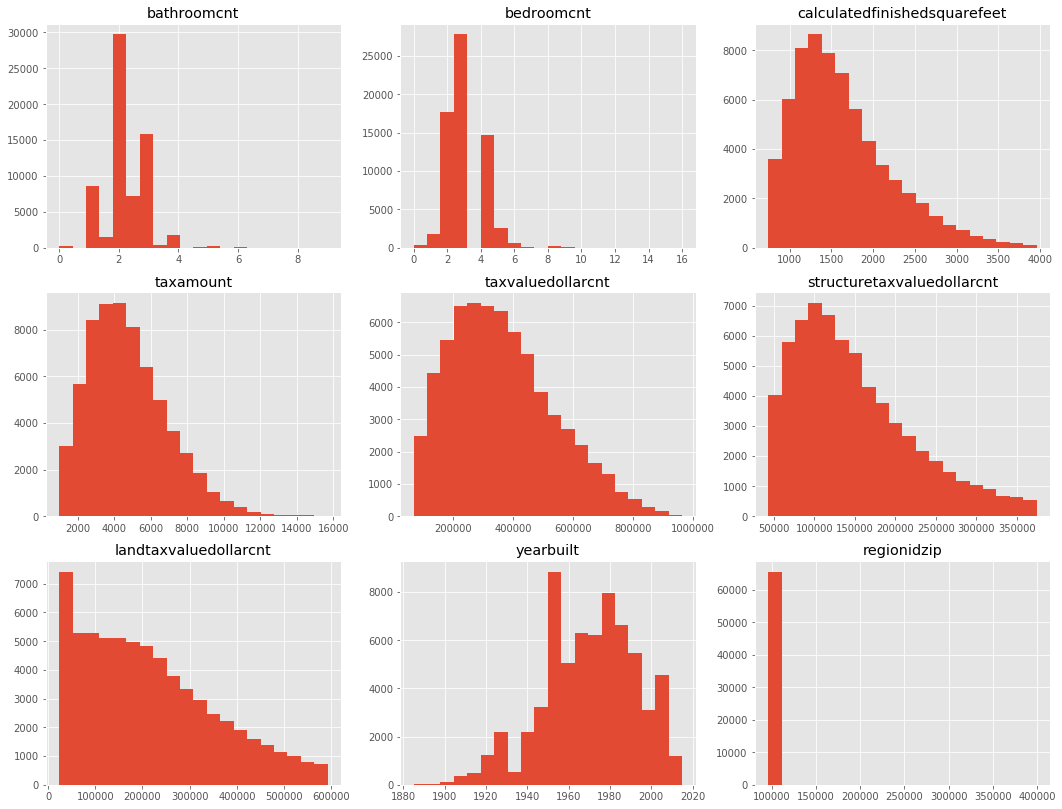

In [45]:
plt.figure(figsize=(18,14))
for i, col in enumerate(X_vars):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    df[col].hist(bins=20)

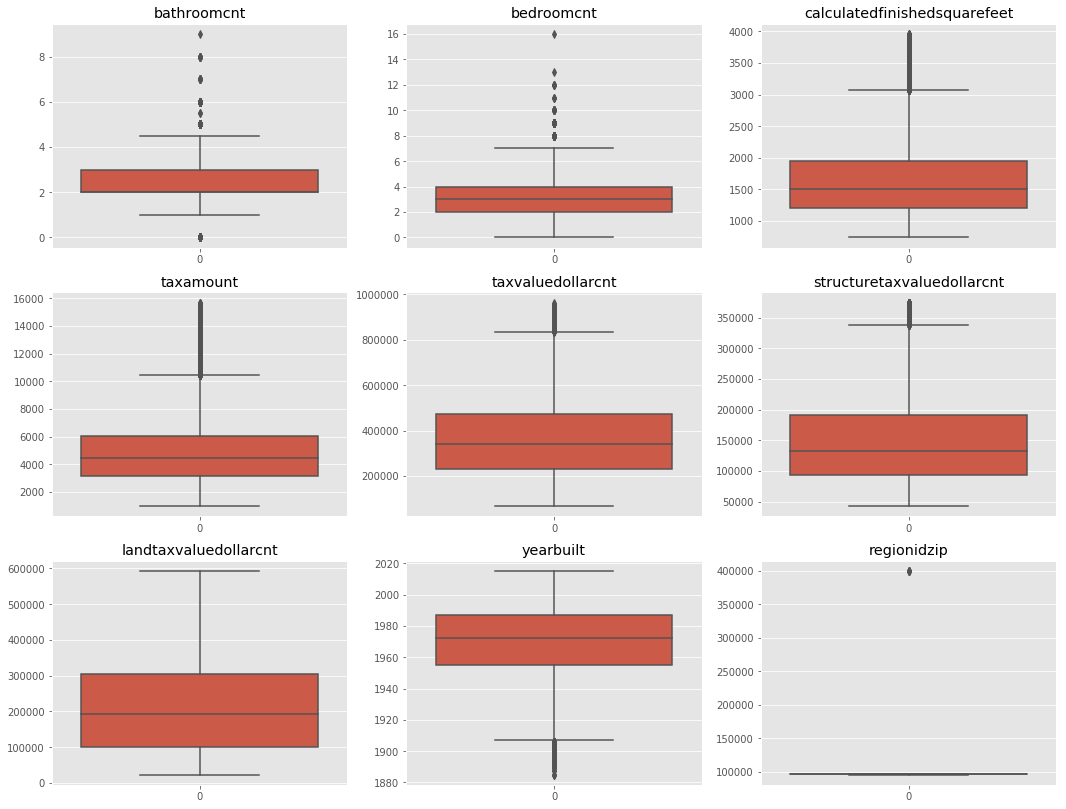

In [46]:
plt.figure(figsize=(18,14))
for plot_num, col in enumerate(X_vars):  
    plt.subplot(3, 3, plot_num + 1)
    plt.title(col)
    sns.boxplot(data=df[col])
# still showing outliers now... must be inside of the point where I dropped

In [47]:
summarize_df(df)

Summary of Data

Rows & Columns:

(65639, 10)
Variables:

['logerror' 'bathroomcnt' 'bedroomcnt' 'calculatedfinishedsquarefeet'
 'taxamount' 'taxvaluedollarcnt' 'structuretaxvaluedollarcnt'
 'landtaxvaluedollarcnt' 'yearbuilt' 'regionidzip']

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65639 entries, 0 to 90274
Data columns (total 10 columns):
logerror                        65639 non-null float64
bathroomcnt                     65639 non-null float64
bedroomcnt                      65639 non-null float64
calculatedfinishedsquarefeet    65639 non-null float64
taxamount                       65639 non-null float64
taxvaluedollarcnt               65639 non-null float64
structuretaxvaluedollarcnt      65639 non-null float64
landtaxvaluedollarcnt           65639 non-null float64
yearbuilt                       65639 non-null float64
regionidzip                     65639 non-null float64
dtypes: float64(10)
memory usage: 8.0 MB
None

Numeric Summary Stats:

           lo

In [48]:
df.head(3)

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
0,0.0953,2.5,3.0,1264.0,2015.06,191811.0,115087.0,76724.0,1986.0,97081.0
1,0.0198,1.0,2.0,777.0,2581.30,239679.0,143809.0,95870.0,1990.0,97083.0
4,0.0573,2.5,4.0,2415.0,5886.92,554000.0,277000.0,277000.0,1984.0,97084.0


#### BONUS:  Data standardization 
Create a new data frame that is the min-max normalization of the independent variable in the original data frame (+ the original dependent variable). You will normalize each of the numeric independent variables independently, i.e. using the min and max of each variable, not the min/max of the whole dataframe. Why? Regression is very sensitive to difference in units. It will be almost impossible to extract a meaningful linear regression model with such extreme differences in scale. For more context, see: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
You will use this dataframe in the future analysis.

In [49]:
norm_X = X.drop(['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet', 'taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'yearbuilt', 'regionidzip'], axis=1)
norm_X['bath'] = (X.bathroomcnt - X.bathroomcnt.min()) / (X.bathroomcnt.max() - X.bathroomcnt.min())
norm_X['bed'] = (X.bedroomcnt - X.bedroomcnt.min()) / (X.bedroomcnt.max() - X.bedroomcnt.min())
norm_X['totsqft'] = (X.calculatedfinishedsquarefeet - X.calculatedfinishedsquarefeet.min()) / (X.calculatedfinishedsquarefeet.max() - X.calculatedfinishedsquarefeet.min())
norm_X['tax'] = (X.taxamount - X.taxamount.min()) / (X.taxamount.max() - X.taxamount.min())
norm_X['assessed'] = (X.taxvaluedollarcnt - X.taxvaluedollarcnt.min()) / (X.taxvaluedollarcnt.max() - X.taxvaluedollarcnt.min())
norm_X['structure'] = (X.structuretaxvaluedollarcnt - X.structuretaxvaluedollarcnt.min()) / (X.structuretaxvaluedollarcnt.max() - X.structuretaxvaluedollarcnt.min())
norm_X['land'] = (X.landtaxvaluedollarcnt - X.landtaxvaluedollarcnt.min()) / (X.landtaxvaluedollarcnt.max() - X.landtaxvaluedollarcnt.min())
norm_X['year'] = (X.yearbuilt - X.yearbuilt.min()) / (X.yearbuilt.max() - X.yearbuilt.min())
norm_X['zip'] = X.regionidzip
norm_X

,bath,bed,totsqft,tax,assessed,structure,land,year,zip
0,0.277778,0.1875,0.162682,0.070650,0.138542,0.217448,0.093556,0.776923,97081.0
1,0.111111,0.1250,0.011487,0.109127,0.191933,0.304039,0.127213,0.807692,97083.0
4,0.277778,0.2500,0.520025,0.333749,0.542527,0.705582,0.445628,0.761538,97084.0
5,0.277778,0.2500,0.665011,0.145083,0.247625,0.539979,0.077409,0.730769,97089.0
6,0.222222,0.1875,0.320397,0.316441,0.511296,0.428221,0.558136,0.715385,97089.0
7,0.277778,0.3125,0.587395,0.348904,0.561585,0.903385,0.360324,0.661538,97089.0
8,0.222222,0.1875,0.171375,0.275276,0.440573,0.567797,0.365285,0.723077,97091.0
9,0.111111,0.1875,0.200248,0.152328,0.224083,0.275223,0.194684,0.500000,97104.0
11,0.277778,0.2500,0.619373,0.245986,0.370468,0.593582,0.239760,0.761538,97097.0
12,0.222222,0.3125,0.417572,0.408778,0.657413,0.563886,0.709318,0.592308,96383.0


In [50]:
summarize_df(norm_X)

Summary of Data

Rows & Columns:

(65639, 9)
Variables:

['bath' 'bed' 'totsqft' 'tax' 'assessed' 'structure' 'land' 'year' 'zip']

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65639 entries, 0 to 90274
Data columns (total 9 columns):
bath         65639 non-null float64
bed          65639 non-null float64
totsqft      65639 non-null float64
tax          65639 non-null float64
assessed     65639 non-null float64
structure    65639 non-null float64
land         65639 non-null float64
year         65639 non-null float64
zip          65639 non-null float64
dtypes: float64(9)
memory usage: 7.5 MB
None

Numeric Summary Stats:

               bath           bed       totsqft           tax      assessed  \
count  65639.000000  65639.000000  65639.000000  65639.000000  65639.000000   
mean       0.247268      0.188450      0.277936      0.256800      0.330894   
std        0.082128      0.062625      0.182242      0.147305      0.192455   
min        0.000000      0.000000   

In [51]:
# Independent variables:
X_vars = ['bath','bed','totsqft', 'tax', 'assessed', 'structure', 'land', 'year', 'zip']

# Dependent (target) variable, it is continuous
target = ['logerror']

# Creating a melted version of train for visualization purposes
df_melted = pd.melt(df, id_vars=target, value_vars=X_vars, 
                    var_name='home_features', value_name='score')
X = norm_X.copy()                                                     
y = df[['logerror']]

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


### Data Exploration

Goal is to address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.

When you have completed this step, you will have the findings from your analysis that will be used in your final report, the answers to your questions and your customer's questions that will reach the goal. 

#### Split data into training and test datasets

In [52]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

In [53]:
X_vars, target

(['bath',
  'bed',
  'totsqft',
  'tax',
  'assessed',
  'structure',
  'land',
  'year',
  'zip'],
 ['logerror'])

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

<Figure size 1296x1008 with 0 Axes>

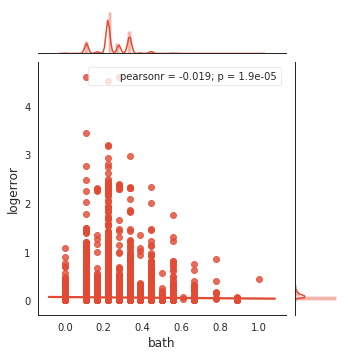

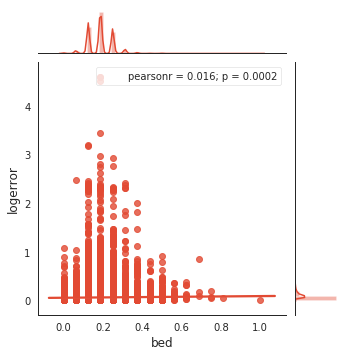

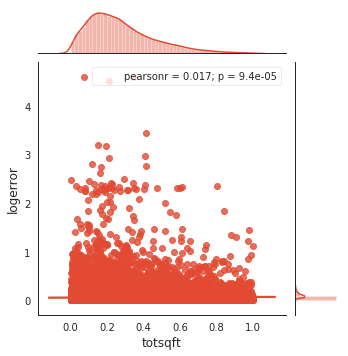

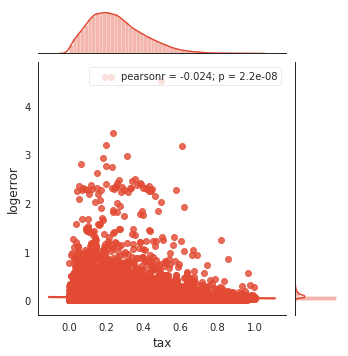

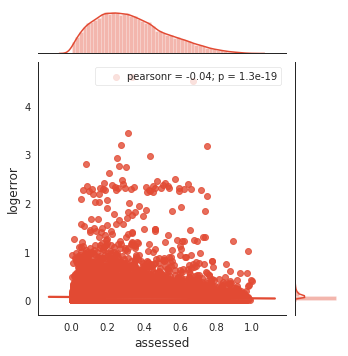

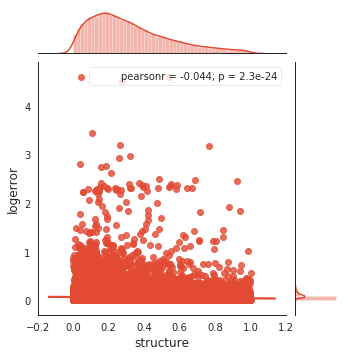

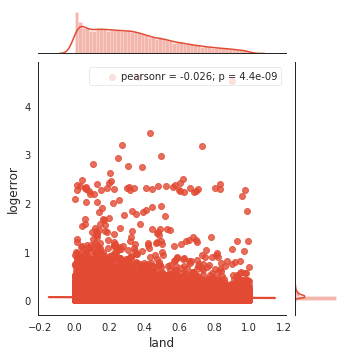

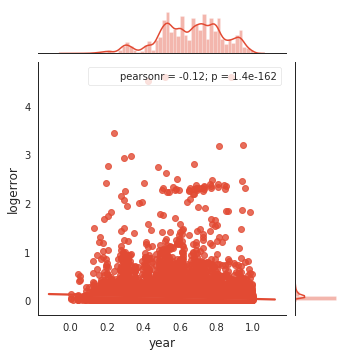

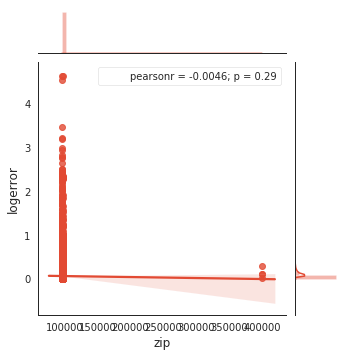

In [54]:
plt.figure(figsize=(18,14))

with sns.axes_style('white'):
    for i, col in enumerate(X_vars):  
        j = sns.jointplot(col, 'logerror', data=train, kind='reg', height=5);
        j.annotate(stats.pearsonr)

plt.show()
# All of the R^2 values are very low, way lower than .5. 
# So they are meaningless by themselves.

#### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent). 

You may want to use a normalized dataframe (if you did that) or adjust the axis scale (set to logarithmic, e.g) so you can more clearly view the interactions.

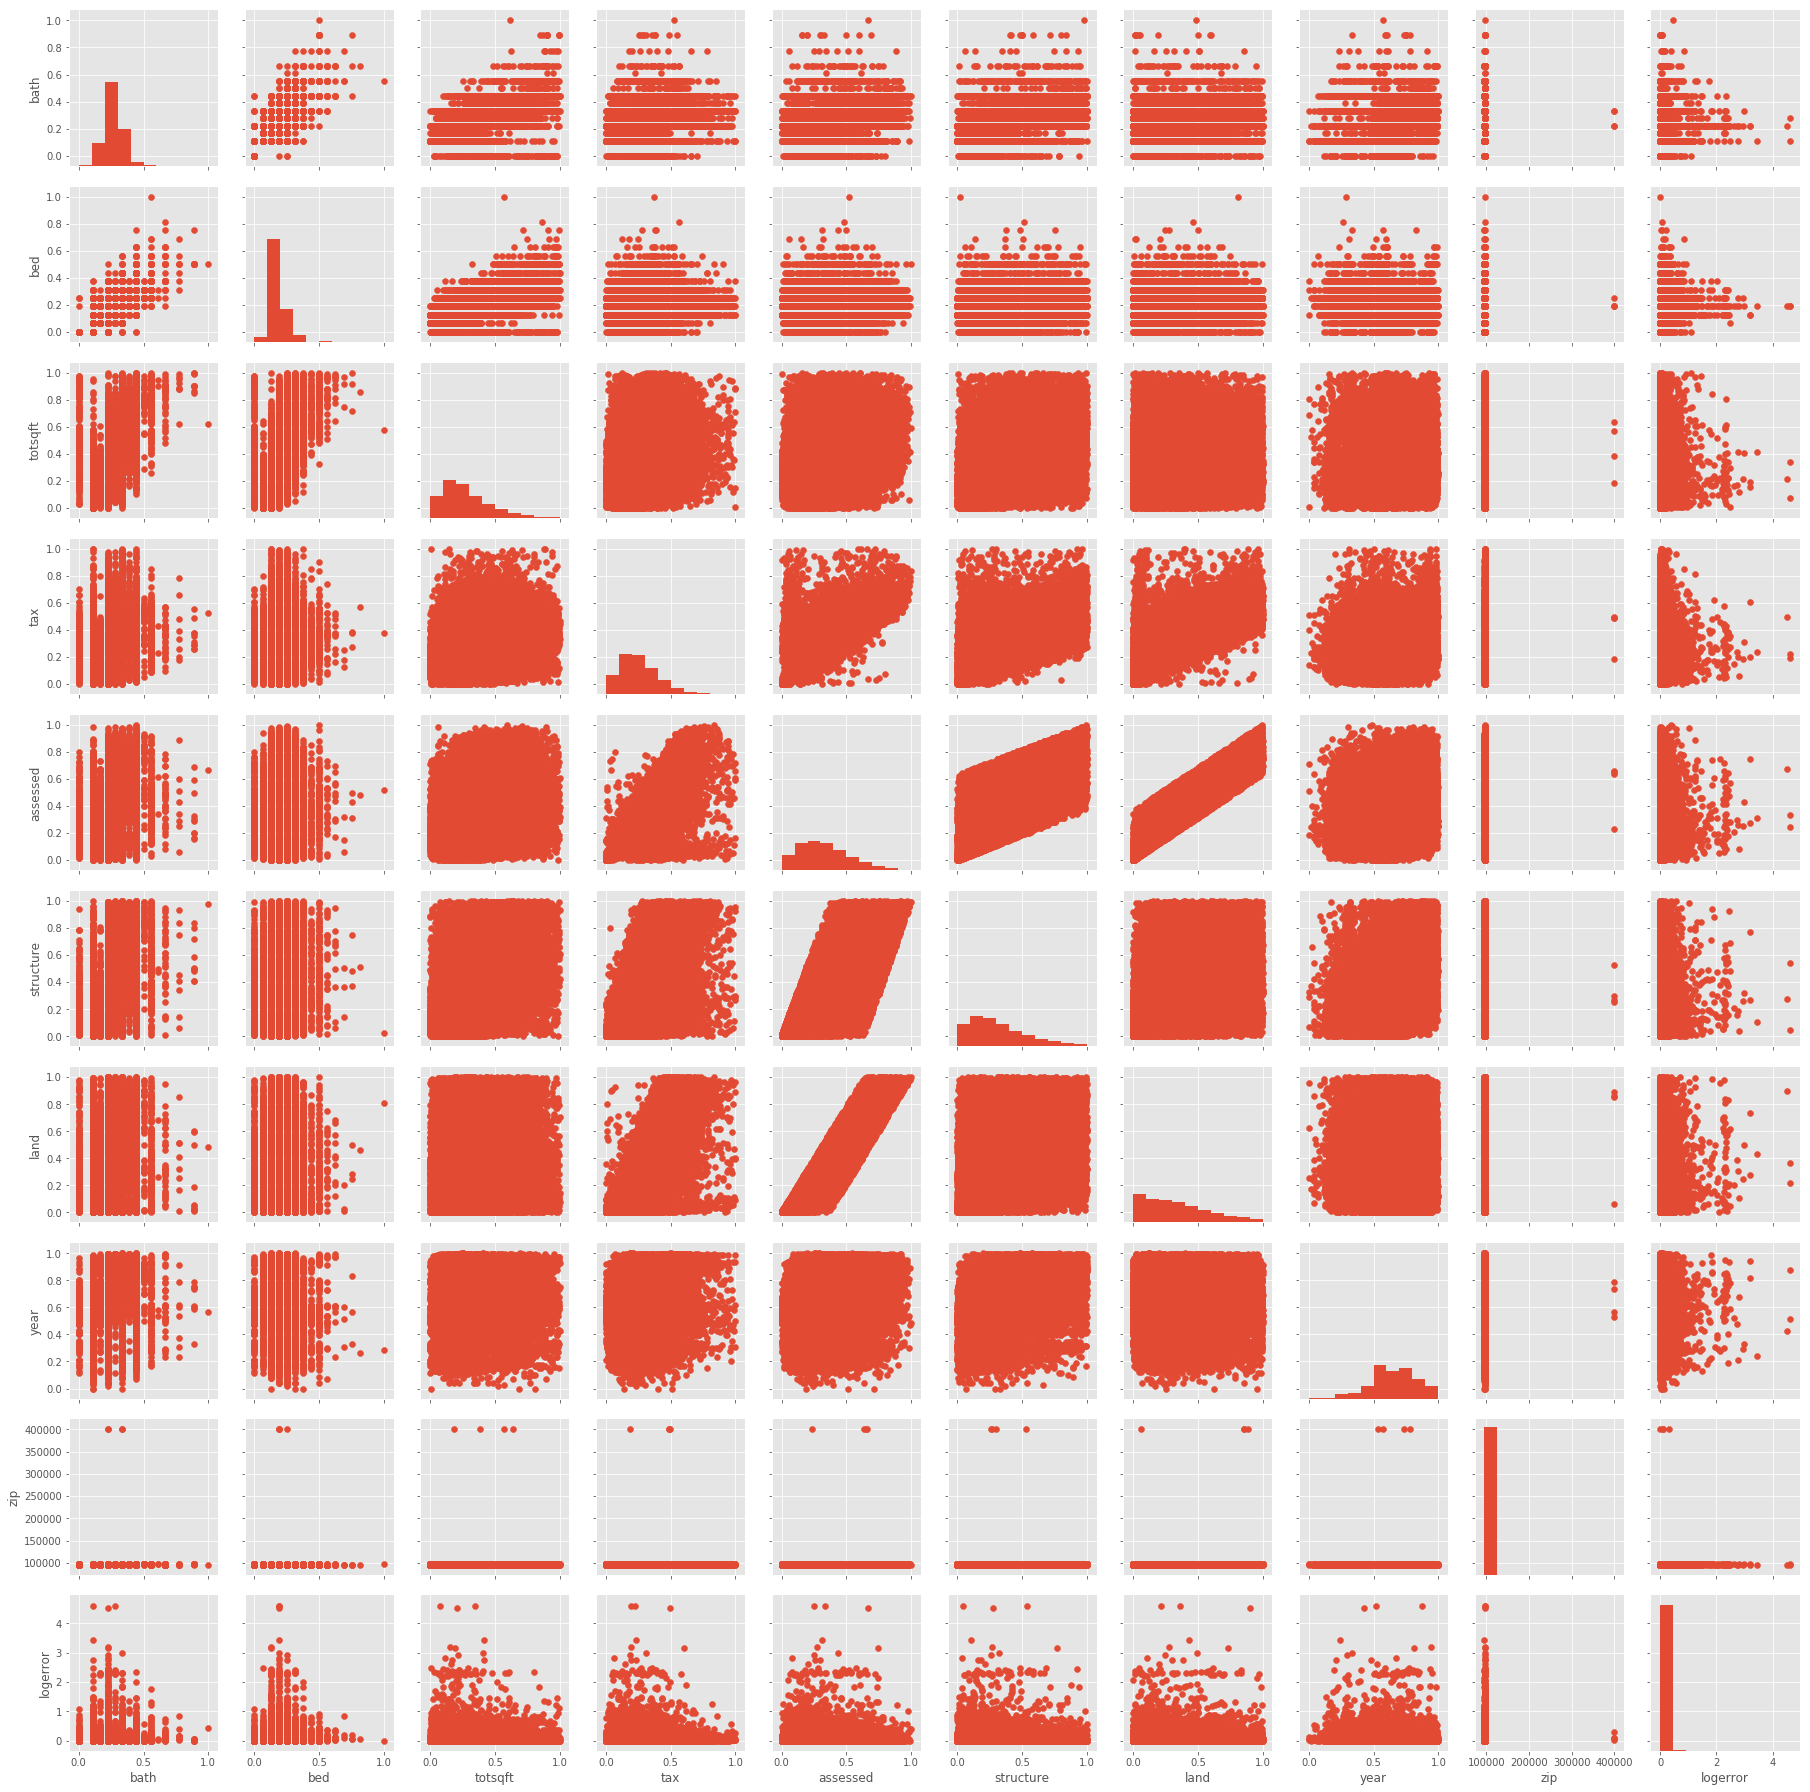

In [55]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
# This shows that looking at the features like this is worthless

#### Create a heatmap of the correlation between each variable pair.

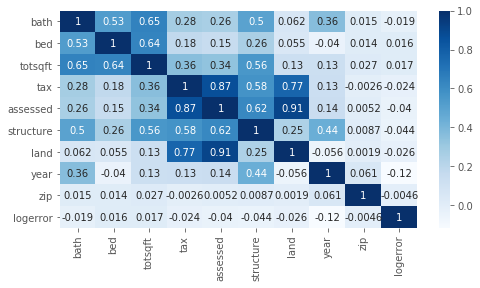

In [56]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
# The only rows/columns that are really useful in terms of finding drivers 
# of logerror are the logerror row and column. 
# And the highest correlation between any feature and logerror is the year built, 
# but at only -0.12, far below a level of significance. 

#### Summarize your conclusions from all of these steps.  

All of this shows that looking at the data without grouping anything is meaningless.

#### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? 
Run a t-test to test this difference.

In [57]:
train.head()

,bath,bed,totsqft,tax,assessed,structure,land,year,zip,logerror
680,0.333333,0.1875,0.179447,0.259229,0.345101,0.223215,0.415743,0.700000,96217.0,0.0139
49516,0.277778,0.1875,0.560385,0.362068,0.364423,0.616003,0.217160,0.869231,96993.0,0.0178
22165,0.111111,0.2500,0.125427,0.242460,0.211421,0.275877,0.174347,0.584615,96374.0,0.0788
30445,0.222222,0.2500,0.278795,0.234084,0.318174,0.424977,0.255657,0.707692,96513.0,0.0169
82639,0.111111,0.1875,0.105557,0.314221,0.435449,0.162316,0.593646,0.507692,96341.0,0.0121


In [58]:
bed_max = df.bedroomcnt.max()
bed_min = df.bedroomcnt.min()
bed_max, bed_min 

(16.0, 0.0)

In [59]:
three_br = train[train.bed == (3-bed_min)/(bed_max-bed_min)]
five_br = train[train.bed >= (5-bed_min)/(bed_max-bed_min)]

from scipy.stats import ttest_ind
ttest_ind(five_br.logerror, three_br.logerror)

# Ttest_indResult(statistic=9.31910098920972, pvalue=1.2673793394949032e-20)
# A t score of 9.3 means the group of three bedrooms is 9.3 standard 
# deviations from the mean of the group with five bedrooms.

#     - The larger the t statistic, the more difference there is between 
#       the groups, the more likely it is that the results are repeatable, 
#       i.e. that the difference is significant.

#     - The smaller the score, the more similarity.

# So this shows that the three and five bedroom groups are significantly 
# different from each other. So I need to group the number of bedrooms 
# and work with that aggragate. 

Ttest_indResult(statistic=9.31910098920972, pvalue=1.2673793394949032e-20)

#### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)

In [60]:
bath_max = df.bathroomcnt.max()
bath_min = df.bathroomcnt.min()
bath_max, bath_min

(9.0, 0.0)

In [61]:
three_bath = train[train.bath == (3-bath_min)/(bath_max-bath_min)]
five_bath = train[train.bath >= (5-bath_min)/(bath_max-bath_min)]

ttest_ind(five_bath.logerror, three_bath.logerror)

# Ttest_indResult(statistic=11.685821179249064, pvalue=2.167495031766075e-31)
# Another large difference, so I definitely need to group my features.

Ttest_indResult(statistic=11.685821179249064, pvalue=2.167495031766075e-31)

### Data Modeling

#### Feature Engineering & Selection

#### Are there new features you could create based on existing features that might be helpful? 

Come up with at least one possible new feature that is a calculation from 2+ existing variables. 

I am adding the following features:

- `rooms` = `bathroomcnt` + `bedroomcnt`
- `pricepersqft` = `taxvaluedollarcnt` / `calculatedfinishedsquarefeet`

In [62]:
df.head(3)

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
0,0.0953,2.5,3.0,1264.0,2015.06,191811.0,115087.0,76724.0,1986.0,97081.0
1,0.0198,1.0,2.0,777.0,2581.30,239679.0,143809.0,95870.0,1990.0,97083.0
4,0.0573,2.5,4.0,2415.0,5886.92,554000.0,277000.0,277000.0,1984.0,97084.0


In [63]:
df['rooms'] = df['bathroomcnt'] + df['bedroomcnt']
df['pricepersqft'] = df['taxvaluedollarcnt'] / df['calculatedfinishedsquarefeet']
df = df[['logerror', 'rooms', 'bathroomcnt', 'bedroomcnt', 'pricepersqft', 'calculatedfinishedsquarefeet', 'taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'yearbuilt', 'regionidzip']]
df.describe()

,logerror,rooms,bathroomcnt,bedroomcnt,pricepersqft,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
count,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000
mean,0.060439,5.240619,2.225415,3.015204,236.737536,1635.232499,4754.509341,364262.326437,149105.212191,215157.114246,1970.030074,96597.064047
std,0.129945,1.529535,0.739149,1.002000,111.030160,587.001464,2167.789480,172543.294684,73275.500021,139158.376640,22.487373,3156.411623
min,0.000000,0.000000,0.000000,0.000000,17.540224,740.000000,975.360000,67603.000000,42960.000000,23505.000000,1885.000000,95982.000000
25%,0.012900,4.000000,2.000000,2.000000,155.415973,1200.000000,3128.130000,230360.500000,92883.500000,101000.000000,1955.000000,96221.000000
50%,0.029600,5.000000,2.000000,3.000000,226.549643,1514.000000,4448.920000,341693.000000,133199.000000,192208.000000,1972.000000,96414.000000
75%,0.062000,6.000000,3.000000,4.000000,306.071849,1949.000000,6046.755000,472760.000000,191141.000000,305994.000000,1987.000000,96990.000000
max,4.605000,21.000000,9.000000,16.000000,1056.288158,3961.000000,15691.670000,964143.000000,374658.000000,592354.000000,2015.000000,399675.000000


In [64]:
X = df.drop(['logerror'], axis=1)

In [65]:
X.describe()

,rooms,bathroomcnt,bedroomcnt,pricepersqft,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt,regionidzip
count,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000
mean,5.240619,2.225415,3.015204,236.737536,1635.232499,4754.509341,364262.326437,149105.212191,215157.114246,1970.030074,96597.064047
std,1.529535,0.739149,1.002000,111.030160,587.001464,2167.789480,172543.294684,73275.500021,139158.376640,22.487373,3156.411623
min,0.000000,0.000000,0.000000,17.540224,740.000000,975.360000,67603.000000,42960.000000,23505.000000,1885.000000,95982.000000
25%,4.000000,2.000000,2.000000,155.415973,1200.000000,3128.130000,230360.500000,92883.500000,101000.000000,1955.000000,96221.000000
50%,5.000000,2.000000,3.000000,226.549643,1514.000000,4448.920000,341693.000000,133199.000000,192208.000000,1972.000000,96414.000000
75%,6.000000,3.000000,4.000000,306.071849,1949.000000,6046.755000,472760.000000,191141.000000,305994.000000,1987.000000,96990.000000
max,21.000000,9.000000,16.000000,1056.288158,3961.000000,15691.670000,964143.000000,374658.000000,592354.000000,2015.000000,399675.000000


In [66]:
# dropping bathroomcnt and bedroomcnt in lieu of rooms
# dropping calculatedfinishedsquarefeet and taxvaluedollarcnt
# in liew of pricepersqft
# dropping taxamount
# dropping structuretaxvaluedollarcnt and landtaxvaluedollarcnt
X = X[['rooms', 'pricepersqft', 'yearbuilt', 'regionidzip']]
X.describe()

,rooms,pricepersqft,yearbuilt,regionidzip
count,65639.000000,65639.000000,65639.000000,65639.000000
mean,5.240619,236.737536,1970.030074,96597.064047
std,1.529535,111.030160,22.487373,3156.411623
min,0.000000,17.540224,1885.000000,95982.000000
25%,4.000000,155.415973,1955.000000,96221.000000
50%,5.000000,226.549643,1972.000000,96414.000000
75%,6.000000,306.071849,1987.000000,96990.000000
max,21.000000,1056.288158,2015.000000,399675.000000


In [67]:
norm_X['rooms'] = (X.rooms - X.rooms.min()) / (X.rooms.max() - X.rooms.min())

In [68]:
norm_X['pricepersqft'] = (X.pricepersqft - X.pricepersqft.min()) / (X.pricepersqft.max() - X.pricepersqft.min())

In [69]:
norm_X.describe()

,bath,bed,totsqft,tax,assessed,structure,land,year,zip,rooms,pricepersqft
count,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000,65639.000000
mean,0.247268,0.188450,0.277936,0.256800,0.330894,0.320006,0.336912,0.654077,96597.064047,0.249553,0.211021
std,0.082128,0.062625,0.182242,0.147305,0.192455,0.220910,0.244631,0.172980,3156.411623,0.072835,0.106888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95982.000000,0.000000,0.000000
25%,0.222222,0.125000,0.142813,0.146285,0.181540,0.150509,0.136231,0.538462,96221.000000,0.190476,0.132733
50%,0.222222,0.187500,0.240298,0.236035,0.305720,0.272052,0.296569,0.669231,96414.000000,0.238095,0.201213
75%,0.333333,0.250000,0.375349,0.344611,0.451912,0.446735,0.496598,0.784615,96990.000000,0.285714,0.277769
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,399675.000000,1.000000,1.000000


In [70]:
norm_X = norm_X[['rooms', 'pricepersqft', 'year', 'zip']]
norm_X.head(3)

,rooms,pricepersqft,year,zip
0,0.261905,0.129203,0.776923,97081.0
1,0.142857,0.280075,0.807692,97083.0
4,0.309524,0.203956,0.761538,97084.0


In [71]:
# Independent variables:
X_vars = ['rooms', 'pricepersqft', 'year', 'zip']

# Dependent (target) variable, it is continuous
target = ['logerror']

# Creating a melted version of train for visualization purposes
df_melted = pd.melt(df, id_vars=target, value_vars=X_vars, 
                    var_name='home_features', value_name='score')
X = norm_X.copy()                                                    
y = df[['logerror']]

In [72]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [73]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)


X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [74]:
X_vars

['rooms', 'pricepersqft', 'year', 'zip']

In [75]:
train.head(3)

,rooms,pricepersqft,year,zip,logerror
680,0.285714,0.258484,0.700000,96217.0,0.0139
49516,0.261905,0.132275,0.869231,96993.0,0.0178
22165,0.238095,0.199511,0.584615,96374.0,0.0788


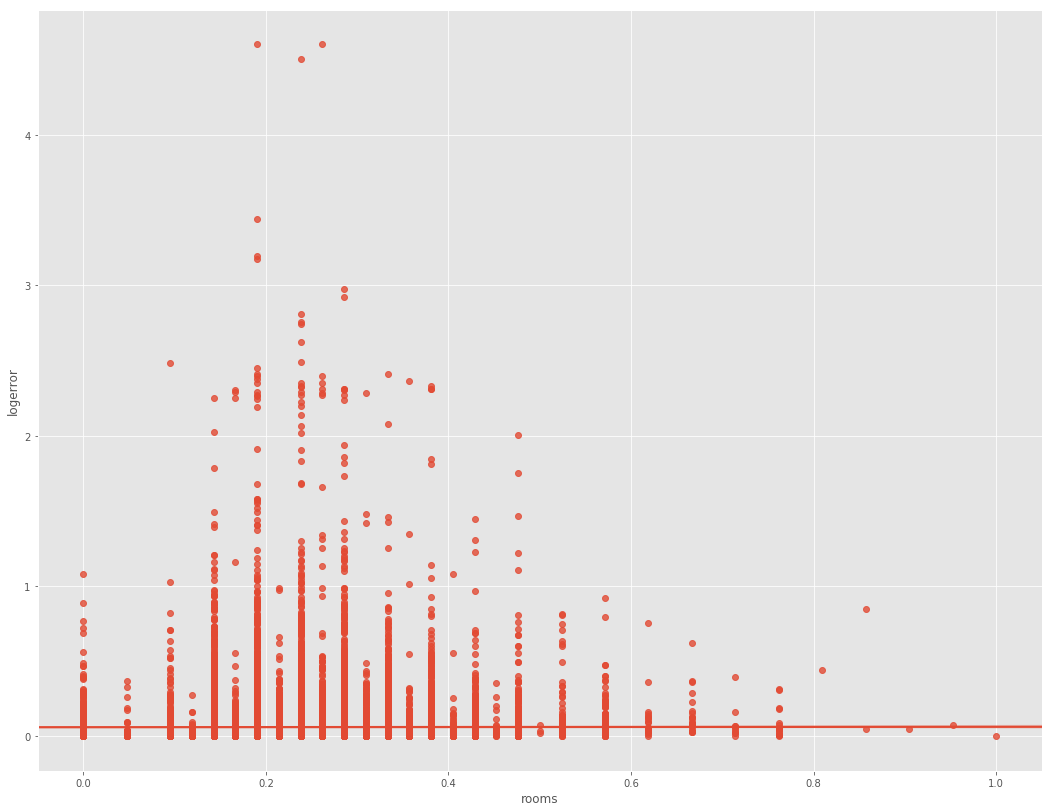

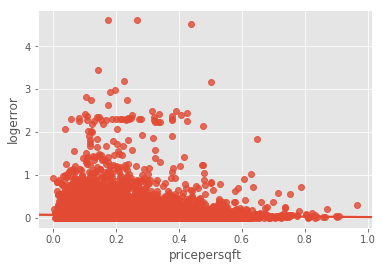

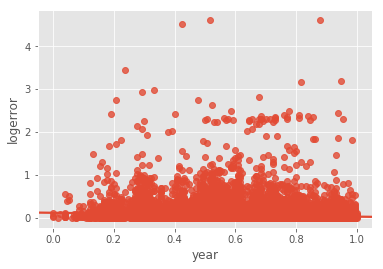

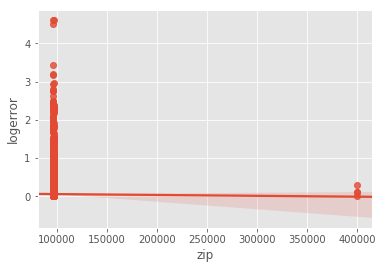

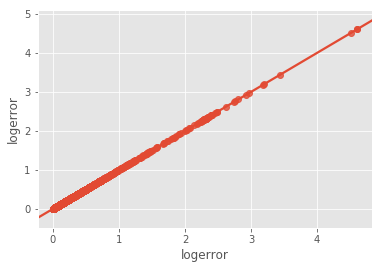

In [76]:
plt.figure(figsize=(18,14))

for col in ('rooms', 'pricepersqft', 'year', 'zip', 'logerror'):  
    j = sns.regplot(x=col, y="logerror", data=train);
    plt.show()

In [77]:
# See how combining room features changed the t-test.
rooms_max = df.rooms.max()
rooms_min = df.rooms.min()
rooms_max, rooms_min # (21.0, 1.0)

(21.0, 0.0)

In [78]:
# T-test determines whether the difference between means found in 
# the sample is significantly different from the hypothesized difference 
# between means.
# A t-test’s statistical significance indicates whether or not the 
# difference between two groups’ averages most likely reflects a “real” 
# difference in the population from which the groups were sampled.

three_rooms = train[train.rooms == (3 - rooms_min) / (rooms_max - rooms_min)]
five_rooms = train[train.rooms >= (5 - rooms_min) / (rooms_max - rooms_min)]

ttest_ind(five_rooms.logerror, three_rooms.logerror)

# Ttest_indResult(statistic=-8.917230699677441, pvalue=4.980553907886011e-19)
# The ttest came down from 11.6858 meaning the hypothesized mean was less
# to -8.0172 meaning the sample mean was less. But the difference is 
# still significant.

# A difference between the 3-room group and the 5-room group is unlikely 
# to have occurred because the sample happened to be atypical.
# I need to group the number of rooms. 

Ttest_indResult(statistic=-8.917230699677441, pvalue=4.980553907886011e-19)

### Generalized Linear Models

In [79]:
train.describe()

,rooms,pricepersqft,year,zip,logerror
count,52511.000000,52511.000000,52511.000000,52511.000000,52511.000000
mean,0.249422,0.211212,0.654376,96588.461046,0.060560
std,0.072739,0.107104,0.173004,2676.624919,0.131331
min,0.000000,0.000000,0.000000,95982.000000,0.000000
25%,0.190476,0.132590,0.538462,96221.000000,0.012900
50%,0.238095,0.201259,0.669231,96415.000000,0.029600
75%,0.285714,0.278132,0.784615,96990.000000,0.062000
max,1.000000,0.966288,1.000000,399675.000000,4.605000


In [80]:
y_train.describe()

,logerror
count,52511.000000
mean,0.060560
std,0.131331
min,0.000000
25%,0.012900
50%,0.029600
75%,0.062000
max,4.605000


In [81]:
X_train.describe()

,rooms,pricepersqft,year,zip
count,52511.000000,52511.000000,52511.000000,52511.000000
mean,0.249422,0.211212,0.654376,96588.461046
std,0.072739,0.107104,0.173004,2676.624919
min,0.000000,0.000000,0.000000,95982.000000
25%,0.190476,0.132590,0.538462,96221.000000
50%,0.238095,0.201259,0.669231,96415.000000
75%,0.285714,0.278132,0.784615,96990.000000
max,1.000000,0.966288,1.000000,399675.000000


### Ordinary Least Squares

In [82]:
X_train = train[['rooms', 'pricepersqft', 'year', 'zip']]

In [83]:
# regress "logerror" onto "rooms" (plus an intercept)
OLS_model = sm.OLS(y_train, X_train)

fit = OLS_model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     3035.
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:28:29   Log-Likelihood:                 32489.
No. Observations:               52511   AIC:                        -6.497e+04
Df Residuals:                   52507   BIC:                        -6.493e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
rooms            0.0187      0.008      2.265      0.023       0.003       0.035
pricepersqft    -0.0442      0.006     -7.964      0.000      -0.055      -0.033
year            -0.0897      0.003    -26.867      0.000      -0.096      -0.083
zip           1.282e-06   3.32e-08     38.569      0.000    1.22e-06    1.35e-06
==============================================================================
Omnibus:                    88821.654   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        108524403.122
Skew:                          11.568   Prob(JB):                         0.00
Kurtosis:                     224.507   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

LinearRegression fits a linear model with coefficients  to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

LinearRegression will take in its fit method arrays (in this case) y_train, X_train and will store the coefficients  of the linear model in its coef_ member:

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 1296x1008 with 0 Axes>

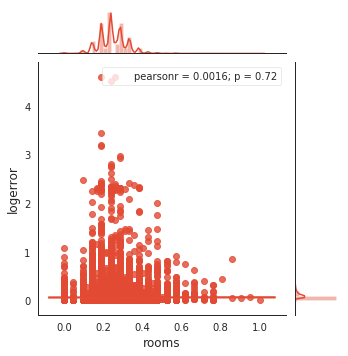

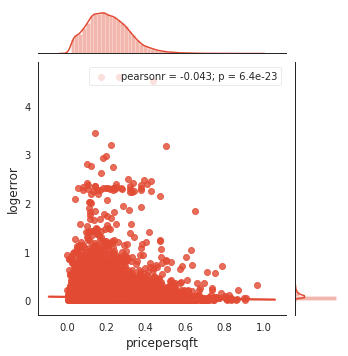

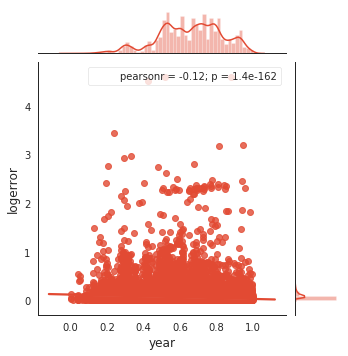

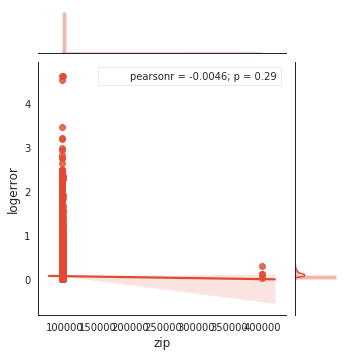

In [84]:
plt.figure(figsize=(18,14))

with sns.axes_style('white'):
    for i, col in enumerate(X_vars):  
        j = sns.jointplot(col, 'logerror', data=train, kind='reg', height=5);
        j.annotate(stats.pearsonr)

plt.show()
# All of the R^2 values are still very low, way lower than .5. 
# So they are still meaningless by themselves.

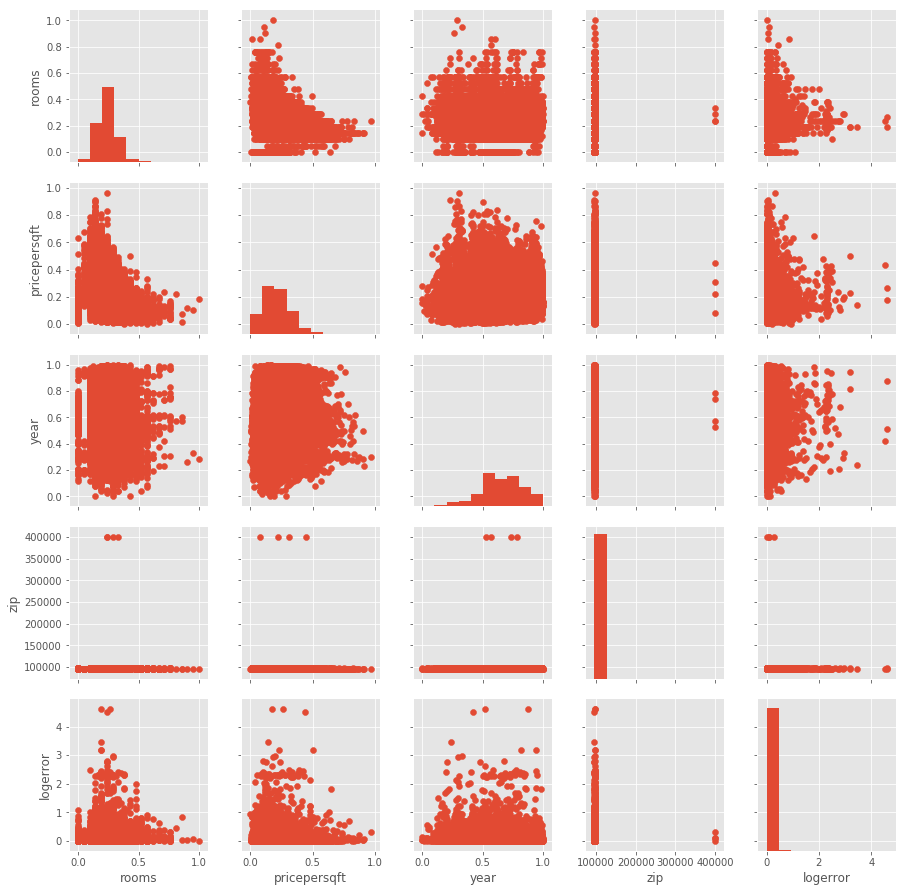

In [85]:
# This is roughly equivalent to sns.jointplot, but we see here that we 
# have the flexibility to customize the type of the plots in each 
# position.
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
# This shows that looking at the features like this doesn't give us
# much information about what the drivers of logerror are. But it 
# does give us some.

# Rooms of small values correlates with price per square foot... 
# no surprise there.

# Also, rooms of small values correlates with the logerror fairly well.

# Rooms of small values correlates fairly well with the year of the house.

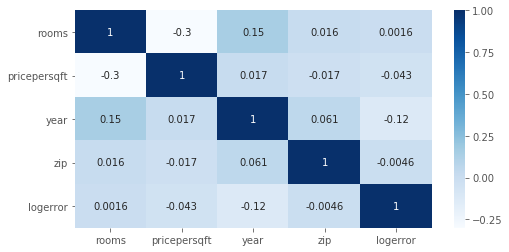

In [86]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

# no significant correlations showing on this heatmap.

In [87]:
[[column, pearsonr(train[column], train.logerror)] for column in X_train] 

[['rooms', (0.0015843977297081686, 0.7165595104517269)],
 ['pricepersqft', (-0.042993352121346876, 6.433383536353381e-23)],
 ['year', (-0.11815671005395484, 1.4492393431976552e-162)],
 ['zip', (-0.004602950439709539, 0.29153537654020184)]]

#### Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target

In [88]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     3035.
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:29:00   Log-Likelihood:                 32489.
No. Observations:               52511   AIC:                        -6.497e+04
Df Residuals:                   52507   BIC:                        -6.493e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
rooms            0.0187      0.008      2.265      0.023       0.003       0.035
pricepersqft    -0.0442      0.006     -7.964      0.000      -0.055      -0.033
year            -0.0897      0.003    -26.867      0.000      -0.096      -0.083
zip           1.282e-06   3.32e-08     38.569      0.000    1.22e-06    1.35e-06
==============================================================================
Omnibus:                    88821.654   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        108524403.122
Skew:                          11.568   Prob(JB):                         0.00
Kurtosis:                     224.507   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Summarize your conclusions and next steps from your analysis in above. 
What will you try when developing your model? (which features to use/not use/etc)

Looking at the p-values of the rooms, pricepersquarefoot, year, and zip code, I am not seeing any significance of any of them with the log error, our target variable.

I will now use sklearn to create three models.

On the first(lm1), I will use rooms, pricepersquarefoot, year, and zip against logerror.

On the second (lm2), I will use just rooms and pricepersquarefoot against logerror.

On the third (lm3), I will use rooms, pricepersquarefoot, and year against logerror.

Then I will compare the results of all three models.

#### Train & Test Model

In [89]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [90]:
X_train.dtypes

rooms           float64
pricepersqft    float64
year            float64
zip             float64
dtype: object

In [91]:
lm1.fit(X_train[['rooms', 'pricepersqft', 'year', 'zip']], y_train)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [92]:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

[0.11730161]
[[ 1.40883119e-02 -4.72821312e-02 -9.01591945e-02  9.03778060e-08]]


In [93]:
print('Multivariate:')
print('logerror = b + m1 * rooms + m2 * pricepersqft + m3 * year + m4 * zip')
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])
print('    coefficient (m3): %.2f' % lm1_coefficients[0][2])
print('    coefficient (m4): %.2f' % lm1_coefficients[0][3])
print()

Multivariate:
logerror = b + m1 * rooms + m2 * pricepersqft + m3 * year + m4 * zip
    y-intercept  (b): 0.12
    coefficient (m1): 0.01
    coefficient (m2): -0.05
    coefficient (m3): -0.09
    coefficient (m4): 0.00



In [94]:
print('logerror = (%.2f) + (%.2f * rooms) + (%.2f * pricepersqft) + (%.2f * year) + (%.2f * zip)' %(lm1_y_intercept, lm1_coefficients[0][0], lm1_coefficients[0][1], lm1_coefficients[0][2], lm1_coefficients[0][3]))

logerror = (0.12) + (0.01 * rooms) + (-0.05 * pricepersqft) + (-0.09 * year) + (0.00 * zip)


#### Fit, predict (in-sample) & evaluate multiple linear regression models to find the best one.

- Make any changes as necessary to improve your model.

- Identify the best model after all training

- Compare the models by plotting the predictions of each model with actual values (see plot right above section 12 in 'Regression in Python' lesson

In [95]:
X_train.head(2)

,rooms,pricepersqft,year,zip
680,0.285714,0.258484,0.700000,96217.0
49516,0.261905,0.132275,0.869231,96993.0


In [96]:
y_pred_lm1 = lm1.predict(X_train)

In [97]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

r2_lm1 = r2_score(y_train, y_pred_lm1)
print("  {:.2%} of the variance in the Zestimate's logerror can be explained by the total number of rooms and the total square feet.".format(r2_lm1))

lm1
  mse: 0.017
  1.57% of the variance in the Zestimate's logerror can be explained by the total number of rooms and the total square feet.


##### Compare the 2 models
We can visualize the predictions by plotting the predictions vs the actual values:

(the predictions are a 1 x 83 two dimensional matrix, but we want just a single array of predictions. We can use the .ravel method to achieve this.)

Text(0.5, 1.0, 'Predicted vs Actual Log Error')

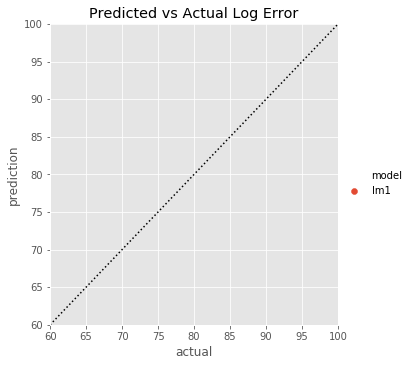

In [98]:
# This code is straight from the skeleton notebook that Maggie gave us
#         later, add back in... #'lm2': y_pred_lm2.ravel()})\

pd.DataFrame({'actual': y_train.logerror,
              'lm1': y_pred_lm1.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Log Error')
# Here the line down the middle represents "perfect" prediction. 
# The further away from this line the are, the farther off the prediction was.
# ... something is wrong because this is a perfect match or one set of values is missing.

#### Predict & evaluate on out-of-sample data (test)    

- Plot the residuals from your out-of-sample predictions.

- Summarize your expectations about how you estimate this model will perform in production.

In [99]:
# Make predictions using the testing set
y_pred_lm1 = lm1.predict(X_test[['rooms', 'pricepersqft', 'year', 'zip']])

In [100]:
mse_lm1 = mean_squared_error(y_test, y_pred_lm1)

print("Mean squared error of lm1: %.2f" % mse_lm1)

Mean squared error of lm1: 0.02


In [101]:
r2_lm1 = r2_score(y_test, y_pred_lm1)

print('{:.2%} of the variance in the logerror can be explained by the number of rooms and the total square footage.'
      .format(r2_lm1))

1.52% of the variance in the logerror can be explained by the number of rooms and the total square footage.


Text(0, 0.5, 'Residuals')

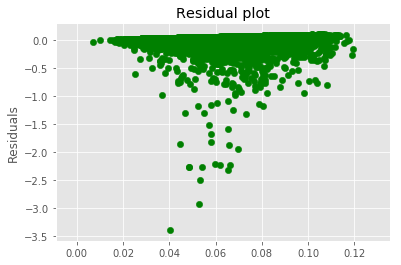

In [102]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.title("Residual plot")
plt.ylabel('Residuals')

The residual plot shows that perhaps I need a different model to show the correlation. I'll try a quadratic model.

In [103]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [104]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.1299588187677176
R2 score of training set is 0.020766715089878485


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.12312214172787703
R2 score of test set is 0.01801762017414199


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

So my residuals are the same for both the training and test data, but my R^2s are both still really small. I am still missing some features.

My next step would be to consider grouping bathroom count and bedroom count to see what impact that has. I also would reconsider dropping garagecarcnt just because it does have such a big impact on home sales.